In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path('../../data/mnist')

In [4]:
path.ls()

[PosixPath('../../data/mnist/valid'),
 PosixPath('../../data/mnist/trainingSet'),
 PosixPath('../../data/mnist/models'),
 PosixPath('../../data/mnist/train'),
 PosixPath('../../data/mnist/testSet'),
 PosixPath('../../data/mnist/testSample')]

# 数据集处理

In [5]:
# (path/'trainingSample').rename(path/'valid')

In [6]:
# import os
# os.mkdir(path/'train')
# trainingSet = path/'trainingSet'
# for child in trainingSet.iterdir():
#     if child.is_dir():
#         os.mkdir(path/'train'/child.name)

In [7]:
# import random
# import shutil
# file_names = list((path/'trainingSet').glob('*/*.jpg'))
# random.shuffle(file_names)
# for file in file_names[:2000]:
#     print(f"copy form {file} to {path/'train'/file.parent.name/file.name}")
#     shutil.copyfile(file, path/'train'/file.parent.name/file.name)

In [8]:
tfms = get_transforms(do_flip=False)

In [9]:
data = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_folder()
       .transform(tfms)
       .databunch(bs=16, num_workers=0))

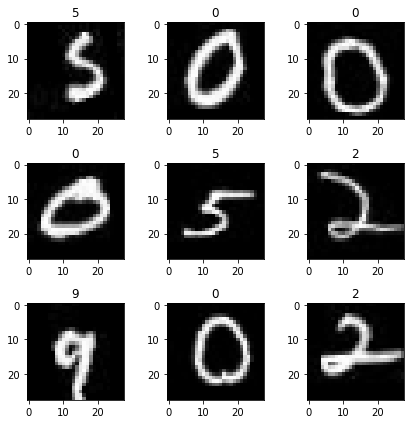

In [10]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [11]:
data

ImageDataBunch;

Train: LabelList (2000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: ../../data/mnist;

Valid: LabelList (600 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: ../../data/mnist;

Test: None

In [12]:
learner = cnn_learner(data, models.resnet18, metrics=error_rate)

In [13]:
import torchsummary

In [26]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
torchsummary.summary(learner.model, (3, 28, 28))
print('parameters_count:',count_parameters(learner.model))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,864
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
       BasicBlock-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 7, 7]          36,864
      BatchNorm2d-13             [-1, 64, 7, 7]             128
             ReLU-14             [-1, 6

In [31]:
list(learner.model.parameters())[0].shape

torch.Size([64, 3, 7, 7])

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


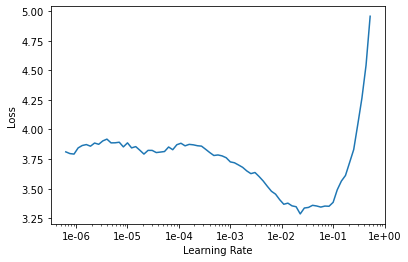

In [15]:
lr_find(learner)
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(8,2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.578908,1.832034,0.531667,00:21


In [33]:
learner.predict(learner.data.train_ds[0][0])[2].argmax()

tensor(9)

In [32]:
type(learner.data.valid_ds[138][0])

fastai.vision.image.Image

In [37]:
learner.predict(learner.data.valid_ds[0][0])[2].argmax()

tensor(3)

In [39]:
learner.data.valid_ds[1][0]

In [20]:
data.valid_ds[138][0].shape

torch.Size([3, 28, 28])

In [21]:
type(data.valid_ds)

fastai.data_block.LabelList

In [22]:
type(data.valid_ds[1])

tuple

In [23]:
len(data.valid_ds[1])

2